In [106]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [107]:
aduduBase = plt.imread('Assets/adudu.jpg')
boboiboyBase = plt.imread('Assets/boboiboy.jpg')

aduduGray = cv2.cvtColor(aduduBase, cv2.COLOR_RGB2GRAY)
boboiboyGray = cv2.cvtColor(boboiboyBase, cv2.COLOR_RGB2GRAY)

In [108]:
meankernel3x3 = np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]])/9

In [109]:
meankernel9x9 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1]])/81

In [110]:
kernelSmooth = np.array([[1/10, 1/10, 1/10],
                     [1/10, 1/5, 1/10],
                     [1/10, 1/10, 1/10]])

kernelSharp = np.array([[1/9, 1/9, 1/9],
                      [1/9, 8/9, 1/9],
                      [1/9, 1/9, 1/9]])

In [111]:
def mode(array):
    sorted_arr = np.sort(array)
    freq = 1
    max_freq = 0
    sorted_modus = []
    modus = []
    curr_num = None
    
    for i in range(len(array)):
        if i == 0:
            curr_num = sorted_arr[i]
        else:
            if sorted_arr[i] == curr_num:
                freq += 1
            else:
                freq = 1
                curr_num = sorted_arr[i]
        
        if freq > max_freq:
            max_freq = freq
            sorted_modus = [sorted_arr[i]]
        elif freq == max_freq:
            sorted_modus.append(sorted_arr[i])
        
    for i in range(len(array)):
        if array[i] in sorted_modus and array[i] not in modus:
            modus.append(array[i])
    
    return modus

def FilterModus(image, y, x):
    padding_size = y // 2
    padded_arr = np.pad(image, padding_size, mode='edge')
    
    copy_arr = np.zeros_like(image).astype(np.float32)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            slice_arr = (padded_arr[i:i + y, j:j + x] / (y * x))
            modus = mode(slice_arr.flatten())
            copy_arr[i, j] = modus[0]
            
    return copy_arr


In [112]:
def Mean(image, baris, kolom):
    hasil = np.zeros(image.shape)
    rows = int((baris-1)/2)
    cols = int((kolom-1)/2)
    _image = np.pad(image, ((rows,rows), (cols, cols)), mode='edge')
    for i in range (hasil.shape[0]):
        for j in range (hasil.shape[1]):
            ratarata = np.sum((_image[i:i+baris,j:j+kolom]/(baris*kolom)))
            hasil[i,j] =ratarata
    return hasil

In [113]:
def Median(image, baris, kolom):
    tengah = int(baris*kolom/2)
    hasil = np.zeros(image.shape)
    rows = int((baris-1)/2)
    cols = int((kolom-1)/2)
    image = np.pad(image,((rows,rows),(cols,cols)),mode='edge')
    for i in range (hasil.shape[0]):
        for j in range (hasil.shape[1]):
            Median = np.zeros(baris*kolom)
            m=0
            for k in range (i,i+baris):
                for l in range (j,j+kolom):
                    Median[m]=image[k,l]
                    m+=1
            Median.sort()
            a = Median[tengah]
            b = Median[tengah-1]
            _Median = int(a+b)/2
            hasil[i,j] =_Median
    return hasil

In [114]:
def Konvolusi(image, kernel):
    
    pad_size = kernel.shape[0] // 2
    gambar_input = np.pad(image, pad_size, mode='constant')

    gambar_konvolusi = np.zeros_like(image).astype(np.float32)

    baris, kolom = image.shape

    for i in range(baris):
        for j in range(kolom):

            gambar_konvolusi[i, j] = np.sum(gambar_input[i:i + kernel.shape[0], j:j + kernel.shape[1]] * kernel)

    return gambar_konvolusi

In [115]:
adudu3x3 = Mean(aduduGray, 3, 3)
adudu9x9 = Mean(aduduGray, 9, 9)
adudu3x3Median = Median(aduduGray, 3, 3)
adudu9x9Median = Median(aduduGray, 9, 9)
adudu3x3Modus = FilterModus(aduduGray, 3, 3)
adudu9x9Modus = FilterModus(aduduGray, 9, 9)
aduduSmoothing = Konvolusi(aduduGray, kernelSmooth)
aduduSharpening = Konvolusi(aduduGray, kernelSharp)

Text(0.5, 1.0, 'Adudu 9x9 Median')

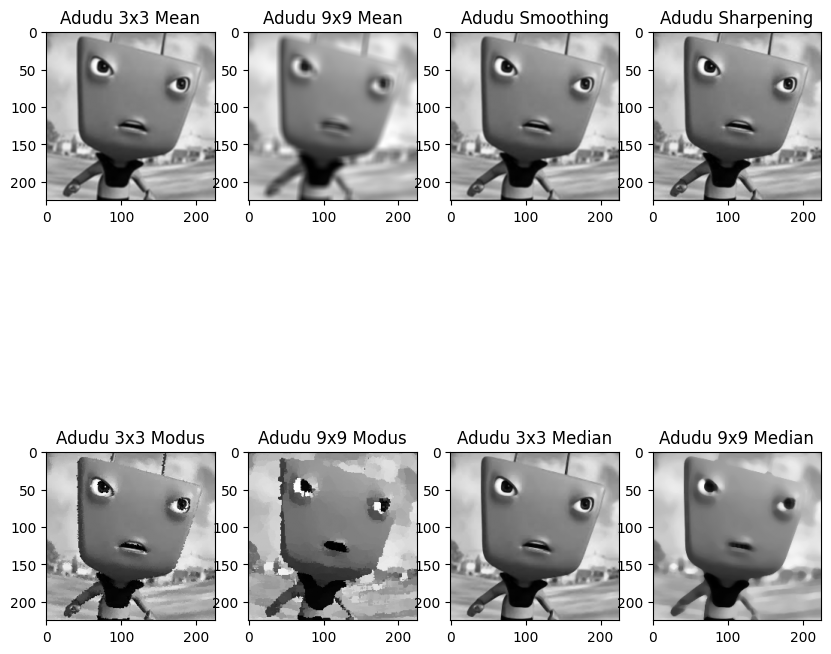

In [116]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 4, 1)
plt.imshow (adudu3x3, cmap='gray')
plt.title('Adudu 3x3 Mean')

plt.subplot(2, 4, 2)
plt.imshow (adudu9x9, cmap='gray')
plt.title('Adudu 9x9 Mean')

plt.subplot(2, 4, 3)
plt.imshow (aduduSmoothing, cmap='gray')
plt.title('Adudu Smoothing')

plt.subplot(2, 4, 4)
plt.imshow (aduduSharpening, cmap='gray')
plt.title('Adudu Sharpening')

plt.subplot(2, 4, 5)
plt.imshow (adudu3x3Modus, cmap='gray')
plt.title('Adudu 3x3 Modus')

plt.subplot(2, 4, 6)
plt.imshow (adudu9x9Modus, cmap='gray')
plt.title('Adudu 9x9 Modus')

plt.subplot(2, 4, 7)
plt.imshow (adudu3x3Median, cmap='gray')
plt.title('Adudu 3x3 Median')

plt.subplot(2, 4, 8)
plt.imshow (adudu9x9Median, cmap='gray')
plt.title('Adudu 9x9 Median')


In [117]:
def sobel(image):
    sobelx = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])

    sobely = np.array([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]])

    def conv(kernel, img):
        result = np.zeros_like(img)
        pad_height, pad_width = img.shape
        kernel_height, kernel_width = kernel.shape
        for i in range(pad_height - kernel_height + 1):
            for j in range(pad_width - kernel_width + 1):
                result[i][j] = np.sum(img[i:i+kernel_height, j:j+kernel_width] * kernel)
        return result

    # Convolve with Roberts kernels
    conv1 = conv(sobelx, image)
    conv2 = conv(sobely, image)
    result = np.sqrt(conv1 ** 2 + conv2 ** 2)
    return result

In [118]:
def prewit(image):
    prewittx = np.array([[-1,  0,  1],
                         [-1,  0,  1],
                         [-1,  0,  1]])

    prewitty = np.array([[-1, -1, -1],
                         [ 0,  0,  0],
                         [ 1,  1,  1]])

    # Conv function
    def conv(kernel, img):
        result = np.zeros_like(img)
        pad_height, pad_width = img.shape
        kernel_height, kernel_width = kernel.shape
        for i in range(pad_height - kernel_height + 1):
            for j in range(pad_width - kernel_width + 1):
                result[i][j] = np.sum(img[i:i+kernel_height, j:j+kernel_width] * kernel)
        return result

    # Convolve with Prewitt kernels
    convx = conv(prewittx, image)
    convy = conv(prewitty, image)
    result = np.sqrt(convx ** 2 + convy ** 2)
    return result


In [119]:
def roberts(image):
    roberts1 = np.array([[1,  0],
                         [0, -1]])

    roberts2 = np.array([[0, 1],
                         [-1, 0]])

    # Convolution function
    def conv(kernel, img):
        result = np.zeros_like(img)
        pad_height, pad_width = img.shape
        kernel_height, kernel_width = kernel.shape
        for i in range(pad_height - kernel_height + 1):
            for j in range(pad_width - kernel_width + 1):
                result[i][j] = np.sum(img[i:i+kernel_height, j:j+kernel_width] * kernel)
        return result

    # Convolve with Roberts kernels
    conv1 = conv(roberts1, image)
    conv2 = conv(roberts2, image)
    result = np.sqrt(conv1 ** 2 + conv2 ** 2)
    return result


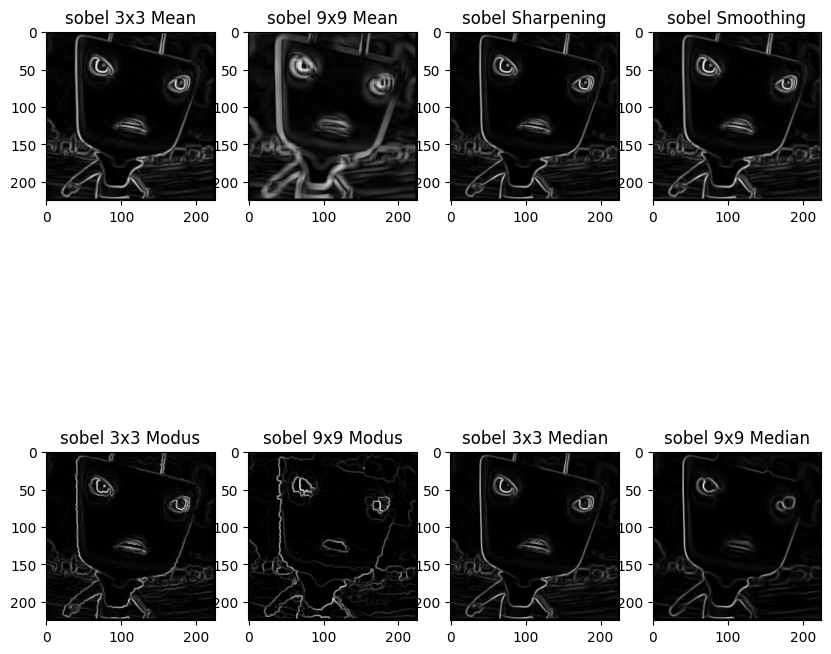

In [121]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 4, 1)
plt.imshow(sobel(adudu3x3), cmap='gray')
plt.title('sobel 3x3 Mean')

plt.subplot(2, 4, 2)
plt.imshow(sobel(adudu9x9), cmap='gray')
plt.title('sobel 9x9 Mean')

plt.subplot(2, 4, 3)
plt.imshow(sobel(aduduSharpening), cmap='gray')
plt.title('sobel Sharpening')

plt.subplot(2, 4, 4)
plt.imshow(sobel(aduduSmoothing), cmap='gray')
plt.title('sobel Smoothing')

plt.subplot(2, 4, 5)
plt.imshow(sobel(adudu3x3Modus), cmap='gray')
plt.title('sobel 3x3 Modus')

plt.subplot(2, 4, 6)
plt.imshow(sobel(adudu9x9Modus), cmap='gray')
plt.title('sobel 9x9 Modus')

plt.subplot(2, 4, 7)
plt.imshow(sobel(adudu3x3Median), cmap='gray')
plt.title('sobel 3x3 Median')

plt.subplot(2, 4, 8)
plt.imshow(sobel(adudu9x9Median), cmap='gray')
plt.title('sobel 9x9 Median')
plt.show()

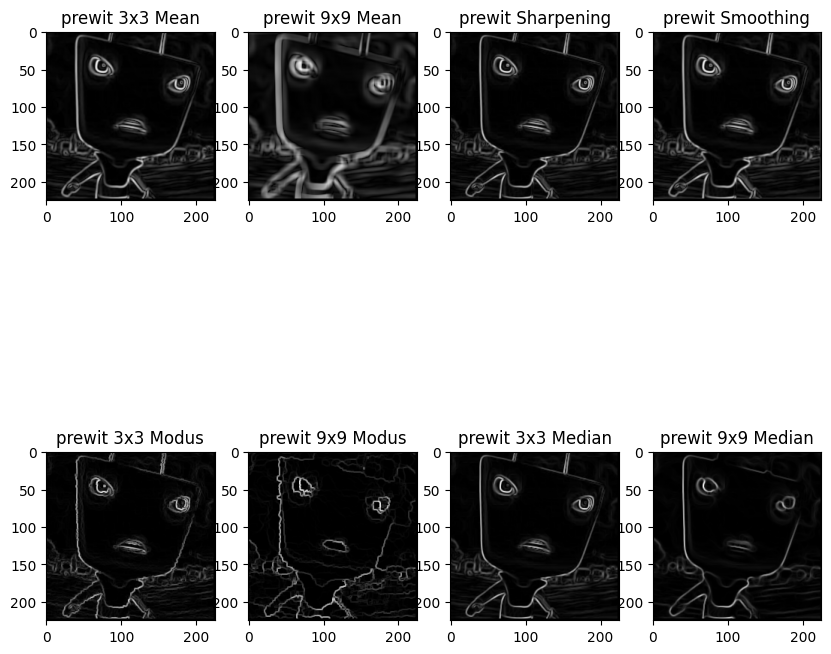

In [122]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 4, 1)
plt.imshow(prewit(adudu3x3), cmap='gray')
plt.title('prewit 3x3 Mean')

plt.subplot(2, 4, 2)
plt.imshow(prewit(adudu9x9), cmap='gray')
plt.title('prewit 9x9 Mean')

plt.subplot(2, 4, 3)
plt.imshow(prewit(aduduSharpening), cmap='gray')
plt.title('prewit Sharpening')

plt.subplot(2, 4, 4)
plt.imshow(prewit(aduduSmoothing), cmap='gray')
plt.title('prewit Smoothing')

plt.subplot(2, 4, 5)
plt.imshow(prewit(adudu3x3Modus), cmap='gray')
plt.title('prewit 3x3 Modus')

plt.subplot(2, 4, 6)
plt.imshow(prewit(adudu9x9Modus), cmap='gray')
plt.title('prewit 9x9 Modus')

plt.subplot(2, 4, 7)
plt.imshow(prewit(adudu3x3Median), cmap='gray')
plt.title('prewit 3x3 Median')

plt.subplot(2, 4, 8)
plt.imshow(prewit(adudu9x9Median), cmap='gray')
plt.title('prewit 9x9 Median')
plt.show()

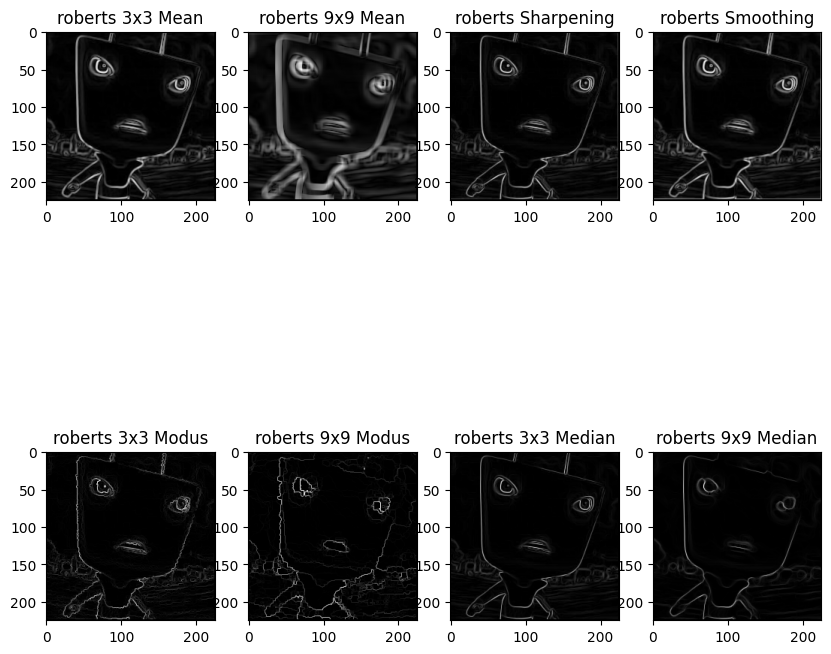

In [123]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 4, 1)
plt.imshow(roberts(adudu3x3), cmap='gray')
plt.title('roberts 3x3 Mean')

plt.subplot(2, 4, 2)
plt.imshow(roberts(adudu9x9), cmap='gray')
plt.title('roberts 9x9 Mean')

plt.subplot(2, 4, 3)
plt.imshow(roberts(aduduSharpening), cmap='gray')
plt.title('roberts Sharpening')

plt.subplot(2, 4, 4)
plt.imshow(roberts(aduduSmoothing), cmap='gray')
plt.title('roberts Smoothing')

plt.subplot(2, 4, 5)
plt.imshow(roberts(adudu3x3Modus), cmap='gray')
plt.title('roberts 3x3 Modus')

plt.subplot(2, 4, 6)
plt.imshow(roberts(adudu9x9Modus), cmap='gray')
plt.title('roberts 9x9 Modus')

plt.subplot(2, 4, 7)
plt.imshow(roberts(adudu3x3Median), cmap='gray')
plt.title('roberts 3x3 Median')

plt.subplot(2, 4, 8)
plt.imshow(roberts(adudu9x9Median), cmap='gray')
plt.title('roberts 9x9 Median')
plt.show()

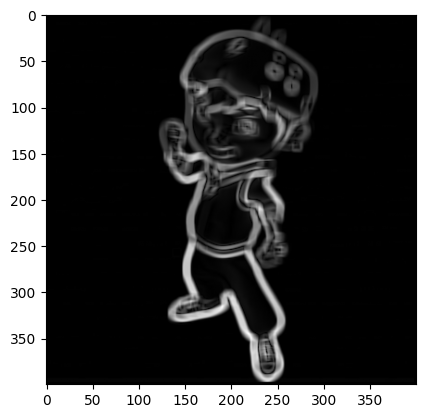

In [126]:
boboiboyMean = Mean(boboiboyGray, 9, 9)
boboiboyPrewitt = prewit(boboiboyMean)

plt.imshow(boboiboyPrewitt, cmap='gray')

In [ ]:
def whitening(gambar, batas):
    m, n = gambar.shape
    out = np.zeros_like(gambar, dtype=float)
    
    for i in range(m):
        for j in range(n):
            if gambar[i, j] > batas:
                out[i, j] = 1.0
            else:
                out[i, j] = 0.0
    
    return out

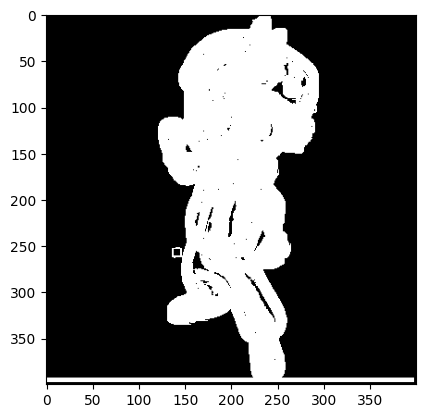

In [137]:
boboiboywhitening = whitening(boboiboyPrewitt, 1.25)
plt.imshow(boboiboywhitening, cmap='gray')